# Assignment 6 - Digital Recognizer

#### 1. Using random forest classifier using the full set of explanatory variables 
#### 2. principal components analysis (PCA) on the combined training and test set data together, generating principal components that represent 95 percent of the variability in the explanatory variables. The number of principal components in the solution should be substantially fewer than the explanatory variables.
#### 3. Using the identified principal components from step (2), use thecsvto build another random forest classifier.
#### 4. Use k-means clustering to group MNIST observations into 1 of 10 categories and then assign labels. 

Ingest

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [19]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [20]:
data.head()
test.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
##Standerization
y = data['label']
x = data.drop('label', axis=1)

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x)
scaler
xs = scaler.transform(x)
x_train, x_test, y_train, y_test = train_test_split(xs, y, train_size = 0.8, random_state=42)

ts = scaler.transform(test) #transforming testing data

StandardScaler()

#### RandomForest Classifier w/o PCA

In [51]:
from sklearn.ensemble import RandomForestClassifier

start=time.time()
rnd_clf = RandomForestClassifier().fit(x_train, y_train)
end=time.time()
print("the running time for Random Forest Classifier model", end-start)


the running time for Random Forest Classifier model 14.190446853637695


In [52]:
rnd_clf.score(x_test, y_test)

0.963452380952381

In [55]:
y_pred1 = rnd_clf.predict(ts)

y_pred1 = pd.Series(y_pred1, name="Label")

pred1 = pd.concat([pd.Series(range(1,28001), name="ImageId"), y_pred1], axis=1)
pred1.to_csv('pred1.csv', index=False)

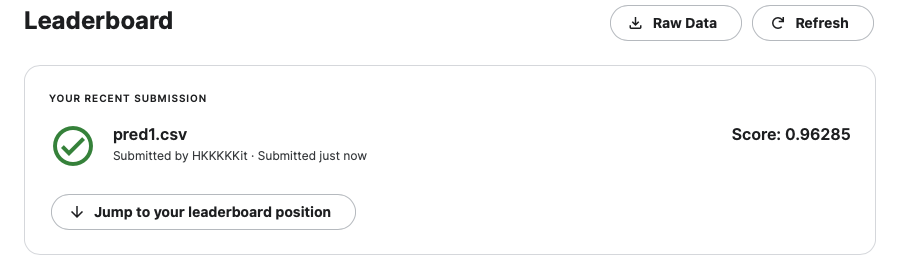

#### PCA

In [106]:
tt = pd.concat([x, test], ignore_index=False)
tt.shape
tts = scaler.transform(tt)

(70000, 784)

In [112]:
pca = PCA(n_components=0.95)
pca.fit(tt)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

start=time.time()
xreduce = pca.fit_transform(tt)
end=time.time()
print("the running time for identify pca", end-start)

PCA(n_components=0.95)

154

the running time for identify pca 3.578260898590088


In [113]:
xreduce

array([[-6.75625509e+02, -6.82915808e+02,  1.86498640e+02, ...,
        -1.08990183e+01, -1.63219488e+01,  6.35662386e+01],
       [ 1.69062514e+03, -4.02068266e+02, -4.88585115e+02, ...,
        -2.65795542e+01, -7.82907326e+00, -4.27981864e+01],
       [-8.90131113e+02, -2.75559563e+02,  7.94427204e+01, ...,
         5.47651313e-01, -1.89874036e+01, -9.32970154e+00],
       ...,
       [-1.38405877e+02, -6.44818778e+02, -8.80688806e+02, ...,
         3.80328093e+01,  7.46148739e+00,  3.37243298e+01],
       [-4.94327683e+01,  5.78108995e+02, -3.23990494e+02, ...,
         1.21587393e+00,  3.78456029e+01,  1.25606721e+01],
       [ 5.97313126e+02,  1.41726610e+02,  8.18148548e+02, ...,
         7.73017610e+01,  4.81828624e+01,  6.94983715e+01]])

Random Forest-PCA

In [69]:
x2 = pca.transform(xs)
test2 = pca.transform(ts)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [70]:
x_train, x_test, y_train, y_test = train_test_split(x2, y, train_size = 0.8, random_state=42)

start=time.time()
rnd_clf2 = RandomForestClassifier().fit(x_train, y_train)
end=time.time()
print("the running time for Random Forest Classifier model", end-start)

y_pred2 = rnd_clf2.predict(test2)

y_pred2 = pd.Series(y_pred2, name="Label")

pred2 = pd.concat([pd.Series(range(1,28001), name="ImageId"), y_pred2], axis=1)
pred2.to_csv('pred2.csv', index=False)

the running time for Random Forest Classifier model 39.987173080444336


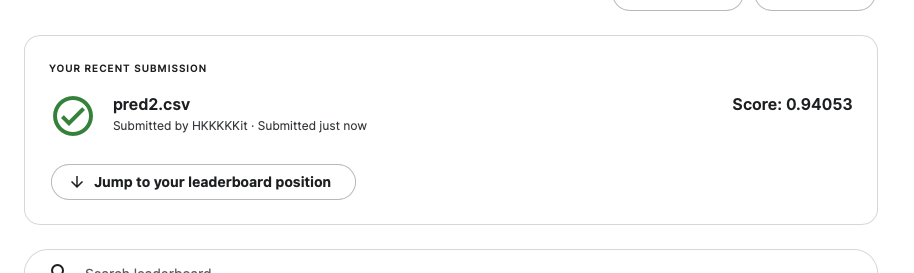

In [140]:
from sklearn.cluster import MiniBatchKMeans
kmeans= MiniBatchKMeans(n_clusters=10,init="k-means++", random_state = 42)
#y_pred3= kmeans.fit_predict(xreduce[42000:])
kmeans.fit(xreduce[42000:])

MiniBatchKMeans(n_clusters=10, random_state=42)

In [118]:
y_pred3 = pd.Series(y_pred3, name="Label")

pred3 = pd.concat([pd.Series(range(1,28001), name="ImageId"), y_pred3], axis=1)
pred3.to_csv('pred3.csv', index=False)

In [119]:
y_pred3

0        0
1        9
2        1
3        1
4        2
        ..
27995    7
27996    7
27997    6
27998    5
27999    0
Name: Label, Length: 28000, dtype: int32

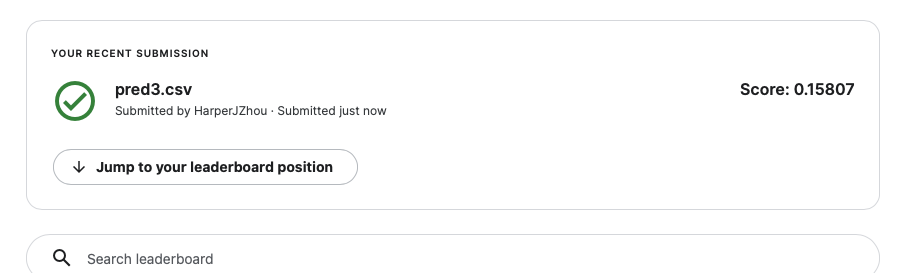

In [102]:
###The kmean clustering has provided low accuracy which could caused by mislabeling

In [144]:
def infer_cluster_labels(kmeans, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """

    inferred_labels = {}

    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]

        #print(labels)
        #print('Cluster: {}, label: {}'.format(i, np.argmax(counts)))
        
    return inferred_labels  

def infer_data_labels(X_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been assigned to.
    returns: predicted labels for each array
    """
    
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels


cluster_labels = infer_cluster_labels(kmeans, y_train)
X_clusters = kmeans.predict(x_train)

predicted_labels = infer_data_labels(X_clusters, cluster_labels)

print (predicted_labels[:20])
print (y[:20])

KeyError: 'key of type tuple not found and not a MultiIndex'